In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def display_img(img):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [19]:
import argparse
import imutils
import cv2

# load the image, convert it to grayscale, blur it slightly,
# and threshold it
image = cv2.imread('opncv/DATA/shapes_and_colors.webp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

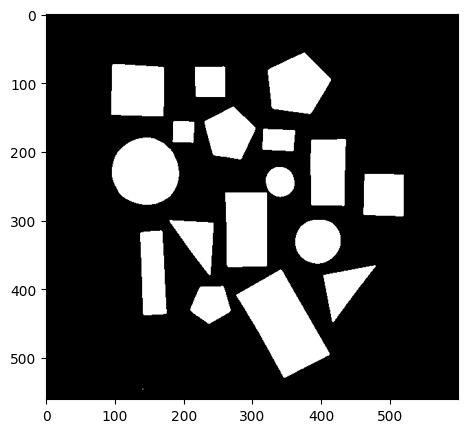

In [20]:
display_img(thresh)

In [25]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

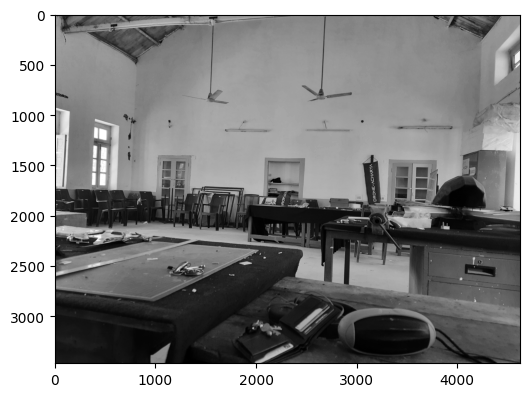

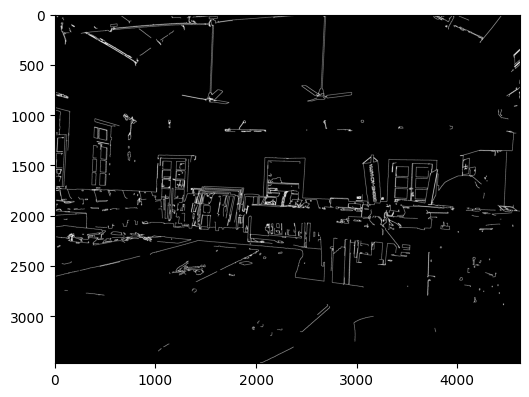

In [31]:
import argparse
import imutils
import cv2

# load the image, convert it to grayscale, blur it slightly,
# and threshold it
img = cv2.imread('opncv/DATA/test_1.jpg',0)
med_val = np.median(img)
blurred_img = cv2.blur(img,ksize=(3,3))
lower = int(max(0, 0.1* med_val))
upper = int(min(255,1.9 * med_val))
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)
cnts = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
external_contours = np.zeros(img.shape)
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        # set values as what you need in the situation
        cX, cY = 0, 0
    # draw the contour and center of the shape on the image
    cv2.drawContours(external_contours, [c], -1, (255, 255, 255), 2)
    #cv2.circle(img, (cX, cY), 2, (0,0,255), -1)
    # show the image
    #cv2.imshow("Image", image)
    #cv2.waitKey(0)
display_img(img)
display_img(external_contours)
#cv2.destroyAllWindows()